In [1]:
!pip install mglearn

  Running setup.py bdist_wheel for mglearn: started
  Running setup.py bdist_wheel for mglearn: finished with status 'done'
  Stored in directory: C:\Users\ashis.panda\AppData\Local\pip\Cache\wheels\3b\81\34\a54d61d5d108dfcb016bcd8f4f7d8cc0538994f07704714b8d
Successfully built mglearn


In [2]:
import mglearn

In [4]:
??mglearn

In [19]:
import pandas as pd
import sklearn
from sklearn import *

C:\Users\ashis.panda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ashis.panda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\ashis.panda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into whic

In [15]:
data=pd.read_csv('C:/Users/ashis.panda/Desktop/Python/machineLearning/Knn/Iris.csv')


In [16]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Import the package

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  train_test_split

In [56]:
# X,y=data.iloc[:,0:4],data.iloc[:,4]
X,y=mglearn.datasets.make_forge()

# X

In [58]:
# y.unique()

# Instantiate the package

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
# By default 75 % -25% split

In [60]:
X_test.shape

(7, 2)

In [61]:
n=KNeighborsClassifier(n_neighbors=5)


# Fit

In [62]:
n.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Predict

In [71]:
pred_y=n.predict(X_test)
print("Prediction_values",n.predict(X_test))
print("Actual values",y_test)


Prediction_values [1 0 1 0 1 0 0]
Actual values [1 0 1 0 1 1 0]


# To Know thw accuracy

In [72]:
import numpy as np

print(np.mean(pred_y==y_test))

0.857142857143


In [75]:
print('samples correctly or incorrectly classified')
print(np.where(pred_y!=y_test))

samples correctly or incorrectly classified
(array([5], dtype=int64),)


In [76]:
print(np.where(pred_y==y_test))

(array([0, 1, 2, 3, 4, 6], dtype=int64),)


In [77]:
n.score(X_test,y_test)

0.8571428571428571

In [78]:
n.score(X_train,y_train)

0.94736842105263153

In [79]:
# Breast Cancer dataset

In [85]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
%matplotlib inline

In [86]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

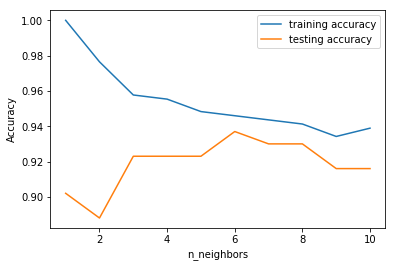

In [89]:
trn_accuracy=[]
tst_accuracy=[]
k_in_neigbors=range(1,11)
for k in k_in_neigbors:
    cl=KNeighborsClassifier(n_neighbors=k)
    cl.fit(X_train,y_train)
    trn_accuracy.append(cl.score(X_train,y_train))
    tst_accuracy.append(cl.score(X_test,y_test))
plt.plot(k_in_neigbors,trn_accuracy,label='training accuracy')
plt.plot(k_in_neigbors,tst_accuracy,label='testing accuracy')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [97]:
# This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the 
# proportion of values provided to parameter stratify.
# For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, 
# stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

# 6 no of clusters is good here

In [98]:
cl=KNeighborsClassifier(n_neighbors=6)
cl.fit(X_train,y_train)
print((cl.score(X_train,y_train)))
print((cl.score(X_test,y_test)))

0.946009389671
0.937062937063


In [95]:
# Knn is simple and can be used to preprocess the data and be used as a baseline method
# Cons-Inability to handle multiple features
# KNN algorithm can also be used for regression problems. 
# It will be using averages of nearest neighbors

In [96]:
# Qs-Why to scale or standardize the data